# Chapter 2: Individual security returns

Based on [Analyzing Financial Data and Implementing Financial Models Using R](https://www.amazon.com/Analyzing-Financial-Implementing-Springer-Economics/dp/3030641546) by Clifford S. Ang (Springer), but we're using Python instead of R.

This notebook is based on the first edition. There's a newer second edition of the book but I don't have it.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

# Cache API calls
import requests_cache

In [2]:
# FIXME Temporarily pinning pandas to 1.3.5 since 1.4.0 breaks Ticker.history() in yfinance 0.1.69.
# See https://github.com/ranaroussi/yfinance/issues/937. After yfinance updates this, we can remove
# the pandas version pin.
pd.__version__

'1.3.5'

In [3]:
yf.__version__

'0.1.69'

In [4]:
session = requests_cache.CachedSession("yfinance.cache")
session.headers["User-Agent"] = "prices-notebook/1.0"
o = yf.Ticker("O", session=session)

## 2.1 Price returns

The price return is the percentage change in the closing price of a security. For example, if a security goes from \\$100 to \\$120 over some time period, then the price return is 20%.

$$ PRet_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1$$

Price returns include capital gains, and exclude intermediate cash flows such as stock dividends or bond coupons.

The `Close` column is unadjusted for splits and dividends.

In [5]:
o_df = o.history(start="2021-12-01", end="2022-01-05", auto_adjust=False, back_adjust=False)
o_df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2021-12-01,68.449997,69.089996,65.900002,65.919998,65.693573,6009300,0.000,0
2021-12-02,66.550003,68.059998,66.419998,67.519997,67.288078,5086200,0.000,0
2021-12-03,67.580002,67.879997,66.830002,67.250000,67.019005,4045500,0.000,0
2021-12-06,67.769997,69.580002,67.709999,68.080002,67.846161,5604700,0.000,0
2021-12-07,68.400002,68.879997,68.040001,68.389999,68.155090,6229000,0.000,0
2021-12-08,68.349998,69.089996,68.239998,68.849998,68.613510,4298400,0.000,0
2021-12-09,68.519997,68.519997,67.339996,67.360001,67.128632,3697900,0.000,0
2021-12-10,67.809998,67.809998,66.889999,66.940002,66.710075,3873900,0.000,0
2021-12-13,66.989998,68.470001,66.849998,68.160004,67.925888,4984500,0.000,0


In [6]:
# Discard OHLV and splits as we don't need those.
# We'll keep the adjusted close price so we can compare to the close price following
# the dividend distribution.
o_df = o_df.loc[:, ["Close", "Adj Close", "Dividends"]]
o_df

,Close,Adj Close,Dividends
Date,,,
2021-12-01,65.919998,65.693573,0.000
2021-12-02,67.519997,67.288078,0.000
2021-12-03,67.250000,67.019005,0.000
2021-12-06,68.080002,67.846161,0.000
2021-12-07,68.389999,68.155090,0.000
2021-12-08,68.849998,68.613510,0.000
2021-12-09,67.360001,67.128632,0.000
2021-12-10,66.940002,66.710075,0.000
2021-12-13,68.160004,67.925888,0.000


In [7]:
# Calculate price return.
# Pandas has a ready-made pct_change() function for this.
# fillna(0) handles the first date, where pct_change() is undefined.
o_df["PriceReturn"] = o_df["Close"].pct_change().fillna(0)
o_df

,Close,Adj Close,Dividends,PriceReturn
Date,,,,
2021-12-01,65.919998,65.693573,0.000,0.000000
2021-12-02,67.519997,67.288078,0.000,0.024272
2021-12-03,67.250000,67.019005,0.000,-0.003999
2021-12-06,68.080002,67.846161,0.000,0.012342
2021-12-07,68.389999,68.155090,0.000,0.004553
2021-12-08,68.849998,68.613510,0.000,0.006726
2021-12-09,67.360001,67.128632,0.000,-0.021641
2021-12-10,66.940002,66.710075,0.000,-0.006235
2021-12-13,68.160004,67.925888,0.000,0.018225


The [ex-dividend date](https://www.investopedia.com/terms/e/ex-date.asp) (or _ex-date_) is 2021-12-31.
Notice that before the ex-date, the adjusted close price is lower than the close price, basically in preparation for the price drop on the ex-date. On the ex-date, the two line up. The stock price generally declines by the amount of the dividend on the ex-date.

## 2.2 Total returns

Also known as _holding period returns_. This includes both the capital gain and intermediate cash flows. The _total return_ $R_t$ is given by

$$
R_t 
  = \frac{P_t - P_{t-1} + CF_t}{P_{t-1}} 
  = \underbrace{ \left[ \frac{P_t}{P_{t-1}} - 1 \right]}_\text{Capital gain}
    + \underbrace{ \frac{CF_t}{P_{t-1}} }_\text{CF yield}
$$

(Note that the equation above corrects an error in the book.)

In [8]:
o_df["TotalReturn"] = (o_df["PriceReturn"] + o_df["Dividends"] / o_df["Close"].shift(1)).fillna(0)
o_df

,Close,Adj Close,Dividends,PriceReturn,TotalReturn
Date,,,,,
2021-12-01,65.919998,65.693573,0.000,0.000000,0.000000
2021-12-02,67.519997,67.288078,0.000,0.024272,0.024272
2021-12-03,67.250000,67.019005,0.000,-0.003999,-0.003999
2021-12-06,68.080002,67.846161,0.000,0.012342,0.012342
2021-12-07,68.389999,68.155090,0.000,0.004553,0.004553
2021-12-08,68.849998,68.613510,0.000,0.006726,0.006726
2021-12-09,67.360001,67.128632,0.000,-0.021641,-0.021641
2021-12-10,66.940002,66.710075,0.000,-0.006235,-0.006235
2021-12-13,68.160004,67.925888,0.000,0.018225,0.018225


## 2.3 Logarithmic total returns 

A motivation for using log total returns is that the values are almost identical to total returns, but the calculation is simpler when calculating cumulative returns.

For log total returns, we use total returns based on the _adjusted_ closing price $P_t$. The _logarithmic total return_ $r_t$ is given by

\begin{align}
r_t &= \ln{(1 + R_t)} \\
    &= \ln{\frac {P_t} {P_{t-1}}} \\
    &= \ln{P_t} - \ln{P_{t-1}} \\
\end{align}

In [9]:
o_df["LogTotalReturn"] = (np.log(o_df["Adj Close"]) - np.log(o_df["Adj Close"].shift(1))).fillna(0)
o_df

,Close,Adj Close,Dividends,PriceReturn,TotalReturn,LogTotalReturn
Date,,,,,,
2021-12-01,65.919998,65.693573,0.000,0.000000,0.000000,0.000000
2021-12-02,67.519997,67.288078,0.000,0.024272,0.024272,0.023982
2021-12-03,67.250000,67.019005,0.000,-0.003999,-0.003999,-0.004007
2021-12-06,68.080002,67.846161,0.000,0.012342,0.012342,0.012267
2021-12-07,68.389999,68.155090,0.000,0.004553,0.004553,0.004543
2021-12-08,68.849998,68.613510,0.000,0.006726,0.006726,0.006704
2021-12-09,67.360001,67.128632,0.000,-0.021641,-0.021641,-0.021879
2021-12-10,66.940002,66.710075,0.000,-0.006235,-0.006235,-0.006255
2021-12-13,68.160004,67.925888,0.000,0.018225,0.018225,0.018061


Note that arithmetic total returns and log total returns are nearly identical.

## 2.4 Cumulating multi-day returns 

### 2.4.1 Cumulating arithmetic returns

A cumulating arithmetic return is the product of daily gross returns:

$$ R_{1 \text{ to } T} = (1 + R_1) \times (1 + R_2) \times \cdots \times (1 + R_T) $$

In [10]:
o_df["GrossTotalReturn"] = 1.0 + o_df["TotalReturn"]
o_df["CumGrossTotalReturn"] = o_df["GrossTotalReturn"].cumprod()
o_df["CumNetTotalReturn"] = o_df["CumGrossTotalReturn"] - 1.0
o_df

,Close,Adj Close,Dividends,PriceReturn,TotalReturn,LogTotalReturn,GrossTotalReturn,CumGrossTotalReturn,CumNetTotalReturn
Date,,,,,,,,,
2021-12-01,65.919998,65.693573,0.000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
2021-12-02,67.519997,67.288078,0.000,0.024272,0.024272,0.023982,1.024272,1.024272,0.024272
2021-12-03,67.250000,67.019005,0.000,-0.003999,-0.003999,-0.004007,0.996001,1.020176,0.020176
2021-12-06,68.080002,67.846161,0.000,0.012342,0.012342,0.012267,1.012342,1.032767,0.032767
2021-12-07,68.389999,68.155090,0.000,0.004553,0.004553,0.004543,1.004553,1.037470,0.037470
2021-12-08,68.849998,68.613510,0.000,0.006726,0.006726,0.006704,1.006726,1.044448,0.044448
2021-12-09,67.360001,67.128632,0.000,-0.021641,-0.021641,-0.021879,0.978359,1.021845,0.021845
2021-12-10,66.940002,66.710075,0.000,-0.006235,-0.006235,-0.006255,0.993765,1.015473,0.015473
2021-12-13,68.160004,67.925888,0.000,0.018225,0.018225,0.018061,1.018225,1.033981,0.033981


### 2.4.2 Cumulating logarithmic returns

As an alternative to the cumulative arithmetic returns, we can sum the daily logrithmic returns.

\begin{align}
r_{1 \text{ to } T} &= \ln{R_{1 \text{ to } T}} \\
    &= \ln{((1 + R_1) \times (1 + R_2) \times \cdots \times (1 + R_T))} \\
    &= \ln{(1 + R_1)} + \ln{(1 + R_2)} + \cdots + \ln{(1 + R_T)} \\
    &= r_1 + r_2 + \cdots + r_T \\
    &= \sum_{t=1}^{T}{r_t}
\end{align}

In [11]:
o_df["CumNetTotalReturn2"] = np.exp(o_df["LogTotalReturn"].cumsum()) - 1.0
o_df

,Close,Adj Close,Dividends,PriceReturn,TotalReturn,LogTotalReturn,GrossTotalReturn,CumGrossTotalReturn,CumNetTotalReturn,CumNetTotalReturn2
Date,,,,,,,,,,
2021-12-01,65.919998,65.693573,0.000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
2021-12-02,67.519997,67.288078,0.000,0.024272,0.024272,0.023982,1.024272,1.024272,0.024272,0.024272
2021-12-03,67.250000,67.019005,0.000,-0.003999,-0.003999,-0.004007,0.996001,1.020176,0.020176,0.020176
2021-12-06,68.080002,67.846161,0.000,0.012342,0.012342,0.012267,1.012342,1.032767,0.032767,0.032767
2021-12-07,68.389999,68.155090,0.000,0.004553,0.004553,0.004543,1.004553,1.037470,0.037470,0.037470
2021-12-08,68.849998,68.613510,0.000,0.006726,0.006726,0.006704,1.006726,1.044448,0.044448,0.044448
2021-12-09,67.360001,67.128632,0.000,-0.021641,-0.021641,-0.021879,0.978359,1.021845,0.021845,0.021845
2021-12-10,66.940002,66.710075,0.000,-0.006235,-0.006235,-0.006255,0.993765,1.015473,0.015473,0.015473
2021-12-13,68.160004,67.925888,0.000,0.018225,0.018225,0.018061,1.018225,1.033981,0.033981,0.033981


### 2.4.3 Comparing price return and total return 

In [17]:
o_df["CumGrossPriceReturn"] = (1.0 + o_df["PriceReturn"]).cumprod()

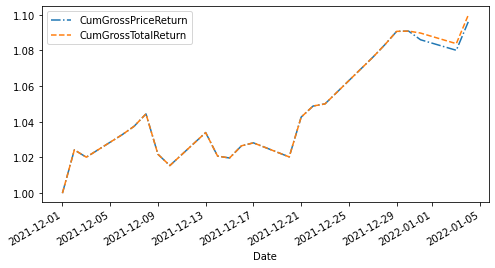

In [37]:
o_df[["CumGrossPriceReturn", "CumGrossTotalReturn"]].plot(style=['-.', '--'], figsize=(8, 4))
plt.show()

## 2.5 Weekly returns

## 2.6 Monthly returns

## 2.7 Comparing performance of multiple securities: total returns